# Aula 10 - Matriz Confusão, Curva ROC, Feature Importance, XGBoost

## Matriz de Confusão Sklearn

In [53]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
actual = [1, 1, 0, 1, 0, 0, 1, 0, 0, 0] 
predicted = [1, 0, 0, 1, 0, 0, 1, 1, 1, 0] 
results = confusion_matrix(actual, predicted) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(actual, predicted))
print('Report : ')
print(classification_report(actual, predicted))

Confusion Matrix :
[[4 2]
 [1 3]]
Accuracy Score : 0.7
Report : 
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10



## Matriz de Confusão Pandas

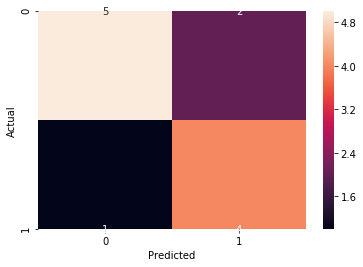

In [54]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Predicted': [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0],
        'y_Actual':    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

## ROC Curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


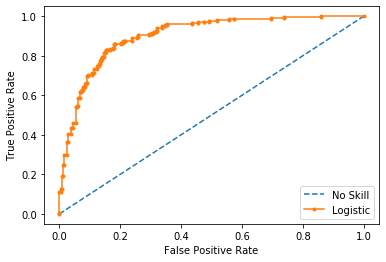

In [41]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## XGBoost

In [10]:
!pip install --upgrade xgboost

You should consider upgrading via the 'pip install --upgrade pip' command.


In [42]:
from numpy import loadtxt
from xgboost import XGBClassifier,XGBRFRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [55]:
# load data
dataset = loadtxt('pima-indians-diabetes.data.csv', delimiter=",")
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [46]:
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [56]:
# fit model no training data
model_xg = XGBClassifier(verbosity=2)
model_xg.fit(X_train, y_train)

[19:12:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:12:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:12:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:12:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:12:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:12:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:12:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[19:12:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[19:12:39] INFO: src/tree/updater_prune.cc:74: tree prun

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=2)

In [21]:
print(model_xg)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=2)


In [59]:
# make predictions for test data
y_pred = model_xg.predict(X_test)
predictions = [round(value) for value in y_pred]

In [60]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%


## Feature Importance

In [61]:
import pandas as pd
feature_importances = pd.DataFrame(model_xg.feature_importances_*100,
                                   index = ["X" + str(i) for i in range(0,X_train.shape[1])],
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=True)
feature_importances

,importance
X0,7.756130
X3,8.040861
X2,8.493615
X4,9.472006
X6,10.214710
X7,10.865614
X5,15.973375
X1,29.183695


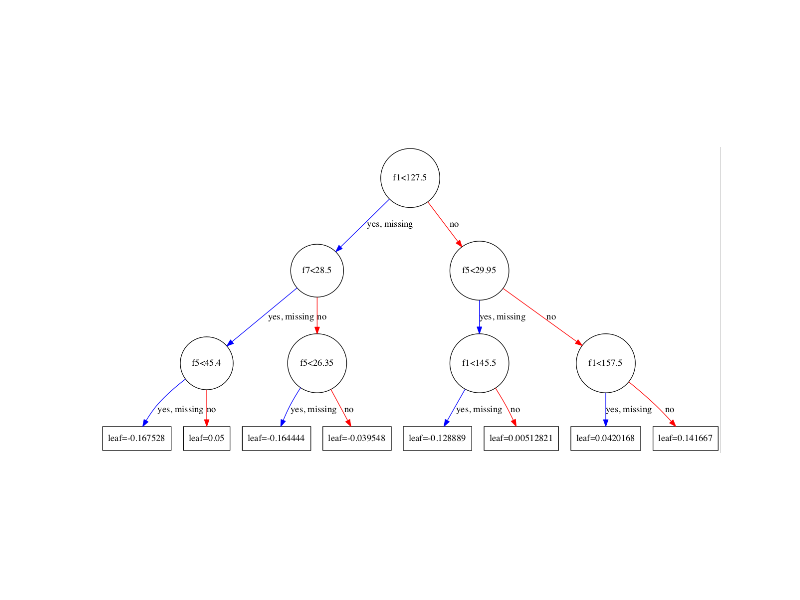

https://datatofish.com/confusion-matrix-python/
https://www.geeksforgeeks.org/confusion-matrix-machine-learning/
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
https://stackabuse.com/understanding-roc-curves-with-python/
https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

https://aichamp.files.wordpress.com/2017/09/tree-0.png?w=1360

https://hackernoon.com/want-a-complete-guide-for-xgboost-model-in-python-using-scikit-learn-sc11f31bq